# Maximum Clique Detection using MILP
This notebook demonstrates how to find the **maximum clique** in an undirected graph using Mixed Integer Linear Programming (MILP).

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import milp, LinearConstraint, Bounds


In [2]:

def build_adj(data):
    '''
    Given a data matrix that contains the edges that connect vertices, this function builds the adjacency matrix that connects edges
    '''
    vertices = np.max(data)
    adj = np.zeros((vertices+1, vertices+1))
    for i in range(0,len(data)):
        adj[int(data[i,0]),int(data[i,1])] = 1
        adj[int(data[i,1]),int(data[i,0])] = 1
    return adj  

def maxclique(adj):
    '''
    Given adjacency matrix, returns the vertices of maximum clique
    '''
    l = len(adj)
    adjcomp = 1 - adj - np.eye(l)
    [v1,v2] = np.where(adjcomp==1)
    A = np.zeros((len(v1),l))
    b = np.ones(len(v1))
    for i in range(0,len(v1)):
        A[i,v1[i]] = 1
        A[i,v2[i]] = 1
    
    f = -np.ones(l)
    integrality = np.ones(l)
    lb = np.zeros(l)
    ub = np.ones(l)
    variable_bounds = Bounds(lb, ub)
    constraints = LinearConstraint(A, -np.inf, b)
    res_milp = milp(f, integrality=integrality, bounds=variable_bounds, constraints=constraints) 
    res_milp.x = [int(x_i) for x_i in res_milp.x]
    new_vertices = np.where(abs(res_milp.x + f) < 0.001)[0].tolist()   
    return new_vertices


## Define the Graph

In [3]:

# Each row defines an undirected edge between nodes
edges = np.array([
    [0, 1],
    [0, 2],
    [1, 2],
    [1, 3],
    [2, 3],
    [3, 4],
    [2, 4]
])

# Build adjacency matrix
adj = build_adj(edges)


## Compute the Maximum Clique

In [4]:

max_clique_vertices = maxclique(adj)
print("Maximum Clique Vertices:", max_clique_vertices)


Maximum Clique Vertices: [1, 2, 3]


## Visualize the Graph and Maximum Clique

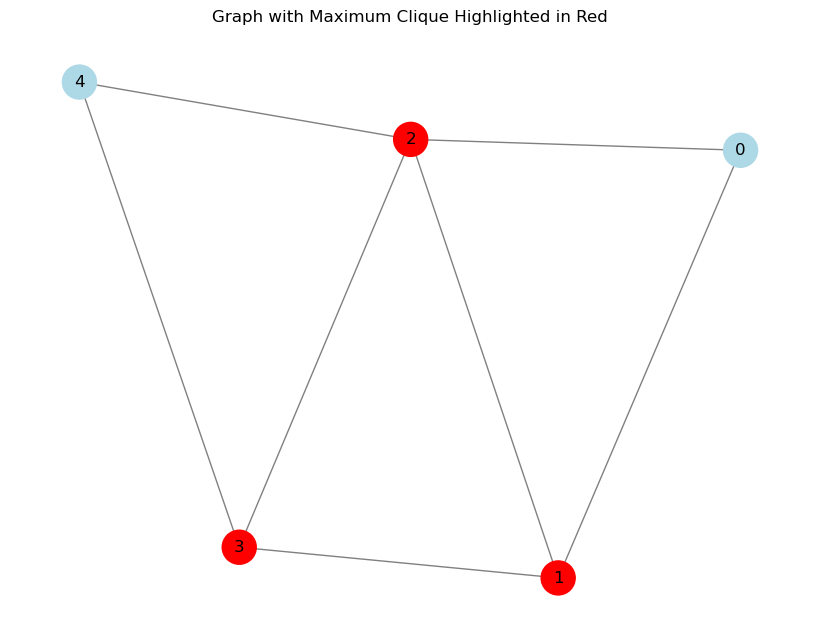

In [5]:

G = nx.Graph()
G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
colors = ['red' if node in max_clique_vertices else 'lightblue' for node in G.nodes()]

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray', node_size=600)
plt.title("Graph with Maximum Clique Highlighted in Red")
plt.show()
